In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

In [41]:
df = pd.read_csv("C:/Users/Asus/Downloads/ml_dataset_20k.csv")
df

,incident_id,probability,is_real_incident,last_order_end,after_order_start,gap_minutes,total_after_distance_km,max_jump_distance_km,mean_speed_kmh,median_speed_kmh,...,bearing_changes,static_segments_ratio,radius_from_start_m,coordinate_stability_m,return_count,after_order_start_hour,after_track_duration_minutes,bearing_changes_ratio,full_stop_count,linearity
0,25744,70,0,0001-01-01T00:00:00,2025-03-10T01:12:28.299000,1.064619e+09,1.124,0.135,0.08,0.04,...,147,0.992,355.60,68.09,482,1,1087.73,0.248,561,0.316
1,25743,0,0,0001-01-01T00:00:00,2025-03-10T18:12:55.712000,1.064620e+09,0.022,0.002,0.46,0.02,...,13,0.973,2.55,0.91,36,18,67.21,0.361,34,0.108
2,25741,70,0,0001-01-01T00:00:00,2025-03-10T16:36:27.604000,1.064620e+09,2.635,0.571,37.35,0.18,...,11,0.776,807.81,227.19,46,16,162.25,0.131,65,0.030
3,25740,70,0,0001-01-01T00:00:00,2025-03-10T12:00:00.595000,1.064620e+09,5.898,0.490,0.90,0.26,...,33,0.872,435.53,131.13,141,12,437.85,0.169,171,0.013
4,25739,0,0,0001-01-01T00:00:00,2025-03-10T19:06:51.672000,1.064621e+09,0.252,0.237,74.77,0.16,...,4,0.875,239.35,74.19,0,19,8.06,0.571,4,0.951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,18169,0,0,0001-01-01T00:00:00,2025-03-07T17:33:35.053000,1.064616e+09,966.486,48.488,343.94,13.26,...,9,0.357,50182.04,19100.16,1,17,166.83,0.107,29,0.010
5934,18167,0,0,0001-01-01T00:00:00,2025-03-07T14:51:46.647000,1.064616e+09,334.557,51.441,57.32,0.00,...,7,0.800,51120.80,15801.63,96,14,328.24,0.040,130,0.020
5935,18164,0,0,0001-01-01T00:00:00,2025-03-07T16:02:20.064000,1.064616e+09,1507.487,50.525,333.97,17.94,...,7,0.272,53736.65,22690.42,7,16,257.15,0.052,32,0.010
5936,18163,0,0,0001-01-01T00:00:00,2025-03-07T19:55:48.762000,1.064616e+09,131.051,50.605,364.91,30.49,...,2,0.000,50468.99,19475.98,0,19,23.07,0.154,0,0.079


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   incident_id                   5938 non-null   int64  
 1   probability                   5938 non-null   int64  
 2   is_real_incident              5938 non-null   int64  
 3   last_order_end                5938 non-null   object 
 4   after_order_start             5938 non-null   object 
 5   gap_minutes                   5938 non-null   float64
 6   total_after_distance_km       5938 non-null   float64
 7   max_jump_distance_km          5938 non-null   float64
 8   mean_speed_kmh                5938 non-null   float64
 9   median_speed_kmh              5938 non-null   float64
 10  max_speed_kmh                 5938 non-null   float64
 11  bearing_changes               5938 non-null   int64  
 12  static_segments_ratio         5938 non-null   float64
 13  rad

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
incident_id,5938.0,2.213511e+04,2.109704e+03,1.816100e+04,2.048625e+04,2.219250e+04,2.393575e+04,2.574400e+04
probability,5938.0,1.967666e+01,2.883067e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+01,7.500000e+01
is_real_incident,5938.0,9.767599e-02,2.969010e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
gap_minutes,5938.0,1.064618e+09,1.247905e+03,1.064614e+09,1.064617e+09,1.064618e+09,1.064619e+09,1.064621e+09
total_after_distance_km,5938.0,5.375512e+02,2.376513e+03,0.000000e+00,2.072500e-01,3.317500e+00,2.350772e+02,7.765309e+04
max_jump_distance_km,5938.0,6.396634e+01,5.663680e+02,0.000000e+00,8.100000e-02,8.390000e-01,3.049300e+01,8.347678e+03
mean_speed_kmh,5938.0,5.146006e+03,1.710007e+05,0.000000e+00,2.600000e-01,3.780000e+00,9.459250e+01,7.981810e+06
median_speed_kmh,5938.0,8.877336e+01,4.105047e+03,0.000000e+00,0.000000e+00,3.000000e-02,2.142500e+00,2.815385e+05
max_speed_kmh,5938.0,4.342568e+05,1.928209e+07,0.000000e+00,7.815000e+00,5.948500e+01,1.490990e+03,1.251772e+09
bearing_changes,5938.0,2.553857e+01,4.342060e+01,0.000000e+00,1.000000e+00,7.000000e+00,3.100000e+01,4.560000e+02


In [44]:
df.is_real_incident.value_counts()

is_real_incident
0    5358
1     580
Name: count, dtype: int64

**Посмотрим на срабатывания датчиков**

C:\Users\Asus\AppData\Local\Temp\ipykernel_12868\3658433271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df['is_real_incident'].value_counts().index, y = df['is_real_incident'].value_counts(), ax = incident_bar, palette=colors)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12868\3658433271.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  incident_bar.set_xticklabels(['Not real', 'Real'])


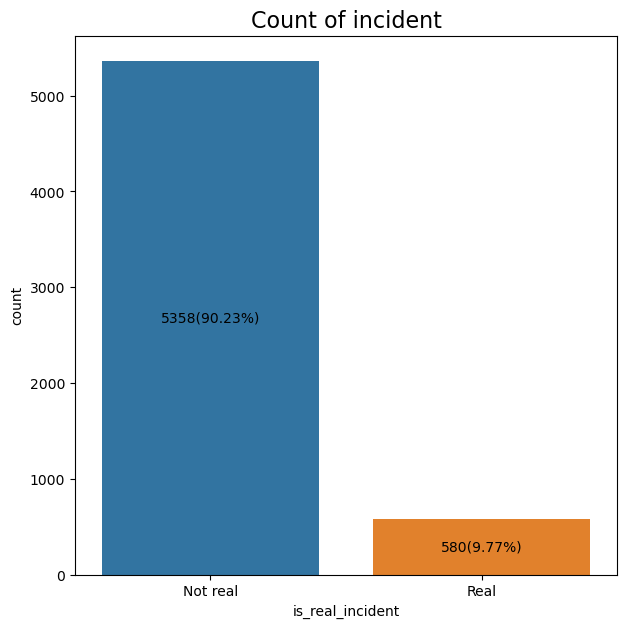

In [45]:
figure, incident_bar = plt.subplots(figsize=(7, 7))
colors = ['#1f77b4', '#ff7f0e'] 
sns.barplot(x= df['is_real_incident'].value_counts().index, y = df['is_real_incident'].value_counts(), ax = incident_bar, palette=colors)
incident_bar.set_xticklabels(['Not real', 'Real'])
incident_bar.set_ylabel('count')
incident_bar.set_title('Count of incident', fontsize = 16)

for patch in incident_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2
    label_y = patch.get_y() + patch.get_height()/2
    incident_bar.text(label_x, label_y,
                      str(int(patch.get_height())) + '(' +
                      '{:.2%}'.format(patch.get_height()/len(df['is_real_incident'])) + ')',
                       horizontalalignment='center', verticalalignment='center')
plt.show()

In [46]:
missing_data = df.isnull()
missing_data.head(6)

,incident_id,probability,is_real_incident,last_order_end,after_order_start,gap_minutes,total_after_distance_km,max_jump_distance_km,mean_speed_kmh,median_speed_kmh,...,bearing_changes,static_segments_ratio,radius_from_start_m,coordinate_stability_m,return_count,after_order_start_hour,after_track_duration_minutes,bearing_changes_ratio,full_stop_count,linearity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df.isnull().sum()

incident_id                     0
probability                     0
is_real_incident                0
last_order_end                  0
after_order_start               0
gap_minutes                     0
total_after_distance_km         0
max_jump_distance_km            0
mean_speed_kmh                  0
median_speed_kmh                0
max_speed_kmh                   0
bearing_changes                 0
static_segments_ratio           0
radius_from_start_m             0
coordinate_stability_m          0
return_count                    0
after_order_start_hour          0
after_track_duration_minutes    0
bearing_changes_ratio           0
full_stop_count                 0
linearity                       0
dtype: int64

In [48]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'missing_values': missing_values,
                          'percent_missing': missing_percent.round(2)})
missing_df

,missing_values,percent_missing
incident_id,0,0.0
probability,0,0.0
is_real_incident,0,0.0
last_order_end,0,0.0
after_order_start,0,0.0
gap_minutes,0,0.0
total_after_distance_km,0,0.0
max_jump_distance_km,0,0.0
mean_speed_kmh,0,0.0
median_speed_kmh,0,0.0


In [49]:
if missing_df['missing_values'].sum() > 0:
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"Заполнили пропуски в столбце {col} медианным значением: {median_value}")

In [50]:
df['last_order_end']

0       0001-01-01T00:00:00
1       0001-01-01T00:00:00
2       0001-01-01T00:00:00
3       0001-01-01T00:00:00
4       0001-01-01T00:00:00
               ...         
5933    0001-01-01T00:00:00
5934    0001-01-01T00:00:00
5935    0001-01-01T00:00:00
5936    0001-01-01T00:00:00
5937    0001-01-01T00:00:00
Name: last_order_end, Length: 5938, dtype: object

In [51]:
data_columns = ['last_order_end', 'after_order_start']
for col in data_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [52]:
df

,incident_id,probability,is_real_incident,last_order_end,after_order_start,gap_minutes,total_after_distance_km,max_jump_distance_km,mean_speed_kmh,median_speed_kmh,...,bearing_changes,static_segments_ratio,radius_from_start_m,coordinate_stability_m,return_count,after_order_start_hour,after_track_duration_minutes,bearing_changes_ratio,full_stop_count,linearity
0,25744,70,0,NaT,2025-03-10 01:12:28.299,1.064619e+09,1.124,0.135,0.08,0.04,...,147,0.992,355.60,68.09,482,1,1087.73,0.248,561,0.316
1,25743,0,0,NaT,2025-03-10 18:12:55.712,1.064620e+09,0.022,0.002,0.46,0.02,...,13,0.973,2.55,0.91,36,18,67.21,0.361,34,0.108
2,25741,70,0,NaT,2025-03-10 16:36:27.604,1.064620e+09,2.635,0.571,37.35,0.18,...,11,0.776,807.81,227.19,46,16,162.25,0.131,65,0.030
3,25740,70,0,NaT,2025-03-10 12:00:00.595,1.064620e+09,5.898,0.490,0.90,0.26,...,33,0.872,435.53,131.13,141,12,437.85,0.169,171,0.013
4,25739,0,0,NaT,2025-03-10 19:06:51.672,1.064621e+09,0.252,0.237,74.77,0.16,...,4,0.875,239.35,74.19,0,19,8.06,0.571,4,0.951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,18169,0,0,NaT,2025-03-07 17:33:35.053,1.064616e+09,966.486,48.488,343.94,13.26,...,9,0.357,50182.04,19100.16,1,17,166.83,0.107,29,0.010
5934,18167,0,0,NaT,2025-03-07 14:51:46.647,1.064616e+09,334.557,51.441,57.32,0.00,...,7,0.800,51120.80,15801.63,96,14,328.24,0.040,130,0.020
5935,18164,0,0,NaT,2025-03-07 16:02:20.064,1.064616e+09,1507.487,50.525,333.97,17.94,...,7,0.272,53736.65,22690.42,7,16,257.15,0.052,32,0.010
5936,18163,0,0,NaT,2025-03-07 19:55:48.762,1.064616e+09,131.051,50.605,364.91,30.49,...,2,0.000,50468.99,19475.98,0,19,23.07,0.154,0,0.079


In [53]:
invalid_dates = pd.isna(df['last_order_end']).shape[0]
if invalid_dates > 0:
    df['has_previous_order'] = (df['last_order_end'] != pd.Timestamp('0001-01-01 00:00:00')).astype(int)

In [54]:
df

,incident_id,probability,is_real_incident,last_order_end,after_order_start,gap_minutes,total_after_distance_km,max_jump_distance_km,mean_speed_kmh,median_speed_kmh,...,static_segments_ratio,radius_from_start_m,coordinate_stability_m,return_count,after_order_start_hour,after_track_duration_minutes,bearing_changes_ratio,full_stop_count,linearity,has_previous_order
0,25744,70,0,NaT,2025-03-10 01:12:28.299,1.064619e+09,1.124,0.135,0.08,0.04,...,0.992,355.60,68.09,482,1,1087.73,0.248,561,0.316,1
1,25743,0,0,NaT,2025-03-10 18:12:55.712,1.064620e+09,0.022,0.002,0.46,0.02,...,0.973,2.55,0.91,36,18,67.21,0.361,34,0.108,1
2,25741,70,0,NaT,2025-03-10 16:36:27.604,1.064620e+09,2.635,0.571,37.35,0.18,...,0.776,807.81,227.19,46,16,162.25,0.131,65,0.030,1
3,25740,70,0,NaT,2025-03-10 12:00:00.595,1.064620e+09,5.898,0.490,0.90,0.26,...,0.872,435.53,131.13,141,12,437.85,0.169,171,0.013,1
4,25739,0,0,NaT,2025-03-10 19:06:51.672,1.064621e+09,0.252,0.237,74.77,0.16,...,0.875,239.35,74.19,0,19,8.06,0.571,4,0.951,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,18169,0,0,NaT,2025-03-07 17:33:35.053,1.064616e+09,966.486,48.488,343.94,13.26,...,0.357,50182.04,19100.16,1,17,166.83,0.107,29,0.010,1
5934,18167,0,0,NaT,2025-03-07 14:51:46.647,1.064616e+09,334.557,51.441,57.32,0.00,...,0.800,51120.80,15801.63,96,14,328.24,0.040,130,0.020,1
5935,18164,0,0,NaT,2025-03-07 16:02:20.064,1.064616e+09,1507.487,50.525,333.97,17.94,...,0.272,53736.65,22690.42,7,16,257.15,0.052,32,0.010,1
5936,18163,0,0,NaT,2025-03-07 19:55:48.762,1.064616e+09,131.051,50.605,364.91,30.49,...,0.000,50468.99,19475.98,0,19,23.07,0.154,0,0.079,1


In [55]:
df['day_of_week'] = df['after_order_start'].dt.day_of_week
df['month'] = df['after_order_start'].dt.month
df['is_weekend'] = df['after_order_start'].dt.dayofweek >= 5

In [56]:
df

,incident_id,probability,is_real_incident,last_order_end,after_order_start,gap_minutes,total_after_distance_km,max_jump_distance_km,mean_speed_kmh,median_speed_kmh,...,return_count,after_order_start_hour,after_track_duration_minutes,bearing_changes_ratio,full_stop_count,linearity,has_previous_order,day_of_week,month,is_weekend
0,25744,70,0,NaT,2025-03-10 01:12:28.299,1.064619e+09,1.124,0.135,0.08,0.04,...,482,1,1087.73,0.248,561,0.316,1,0.0,3.0,False
1,25743,0,0,NaT,2025-03-10 18:12:55.712,1.064620e+09,0.022,0.002,0.46,0.02,...,36,18,67.21,0.361,34,0.108,1,0.0,3.0,False
2,25741,70,0,NaT,2025-03-10 16:36:27.604,1.064620e+09,2.635,0.571,37.35,0.18,...,46,16,162.25,0.131,65,0.030,1,0.0,3.0,False
3,25740,70,0,NaT,2025-03-10 12:00:00.595,1.064620e+09,5.898,0.490,0.90,0.26,...,141,12,437.85,0.169,171,0.013,1,0.0,3.0,False
4,25739,0,0,NaT,2025-03-10 19:06:51.672,1.064621e+09,0.252,0.237,74.77,0.16,...,0,19,8.06,0.571,4,0.951,1,0.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,18169,0,0,NaT,2025-03-07 17:33:35.053,1.064616e+09,966.486,48.488,343.94,13.26,...,1,17,166.83,0.107,29,0.010,1,4.0,3.0,False
5934,18167,0,0,NaT,2025-03-07 14:51:46.647,1.064616e+09,334.557,51.441,57.32,0.00,...,96,14,328.24,0.040,130,0.020,1,4.0,3.0,False
5935,18164,0,0,NaT,2025-03-07 16:02:20.064,1.064616e+09,1507.487,50.525,333.97,17.94,...,7,16,257.15,0.052,32,0.010,1,4.0,3.0,False
5936,18163,0,0,NaT,2025-03-07 19:55:48.762,1.064616e+09,131.051,50.605,364.91,30.49,...,0,19,23.07,0.154,0,0.079,1,4.0,3.0,False


Визуализация распределений числовых признаков:


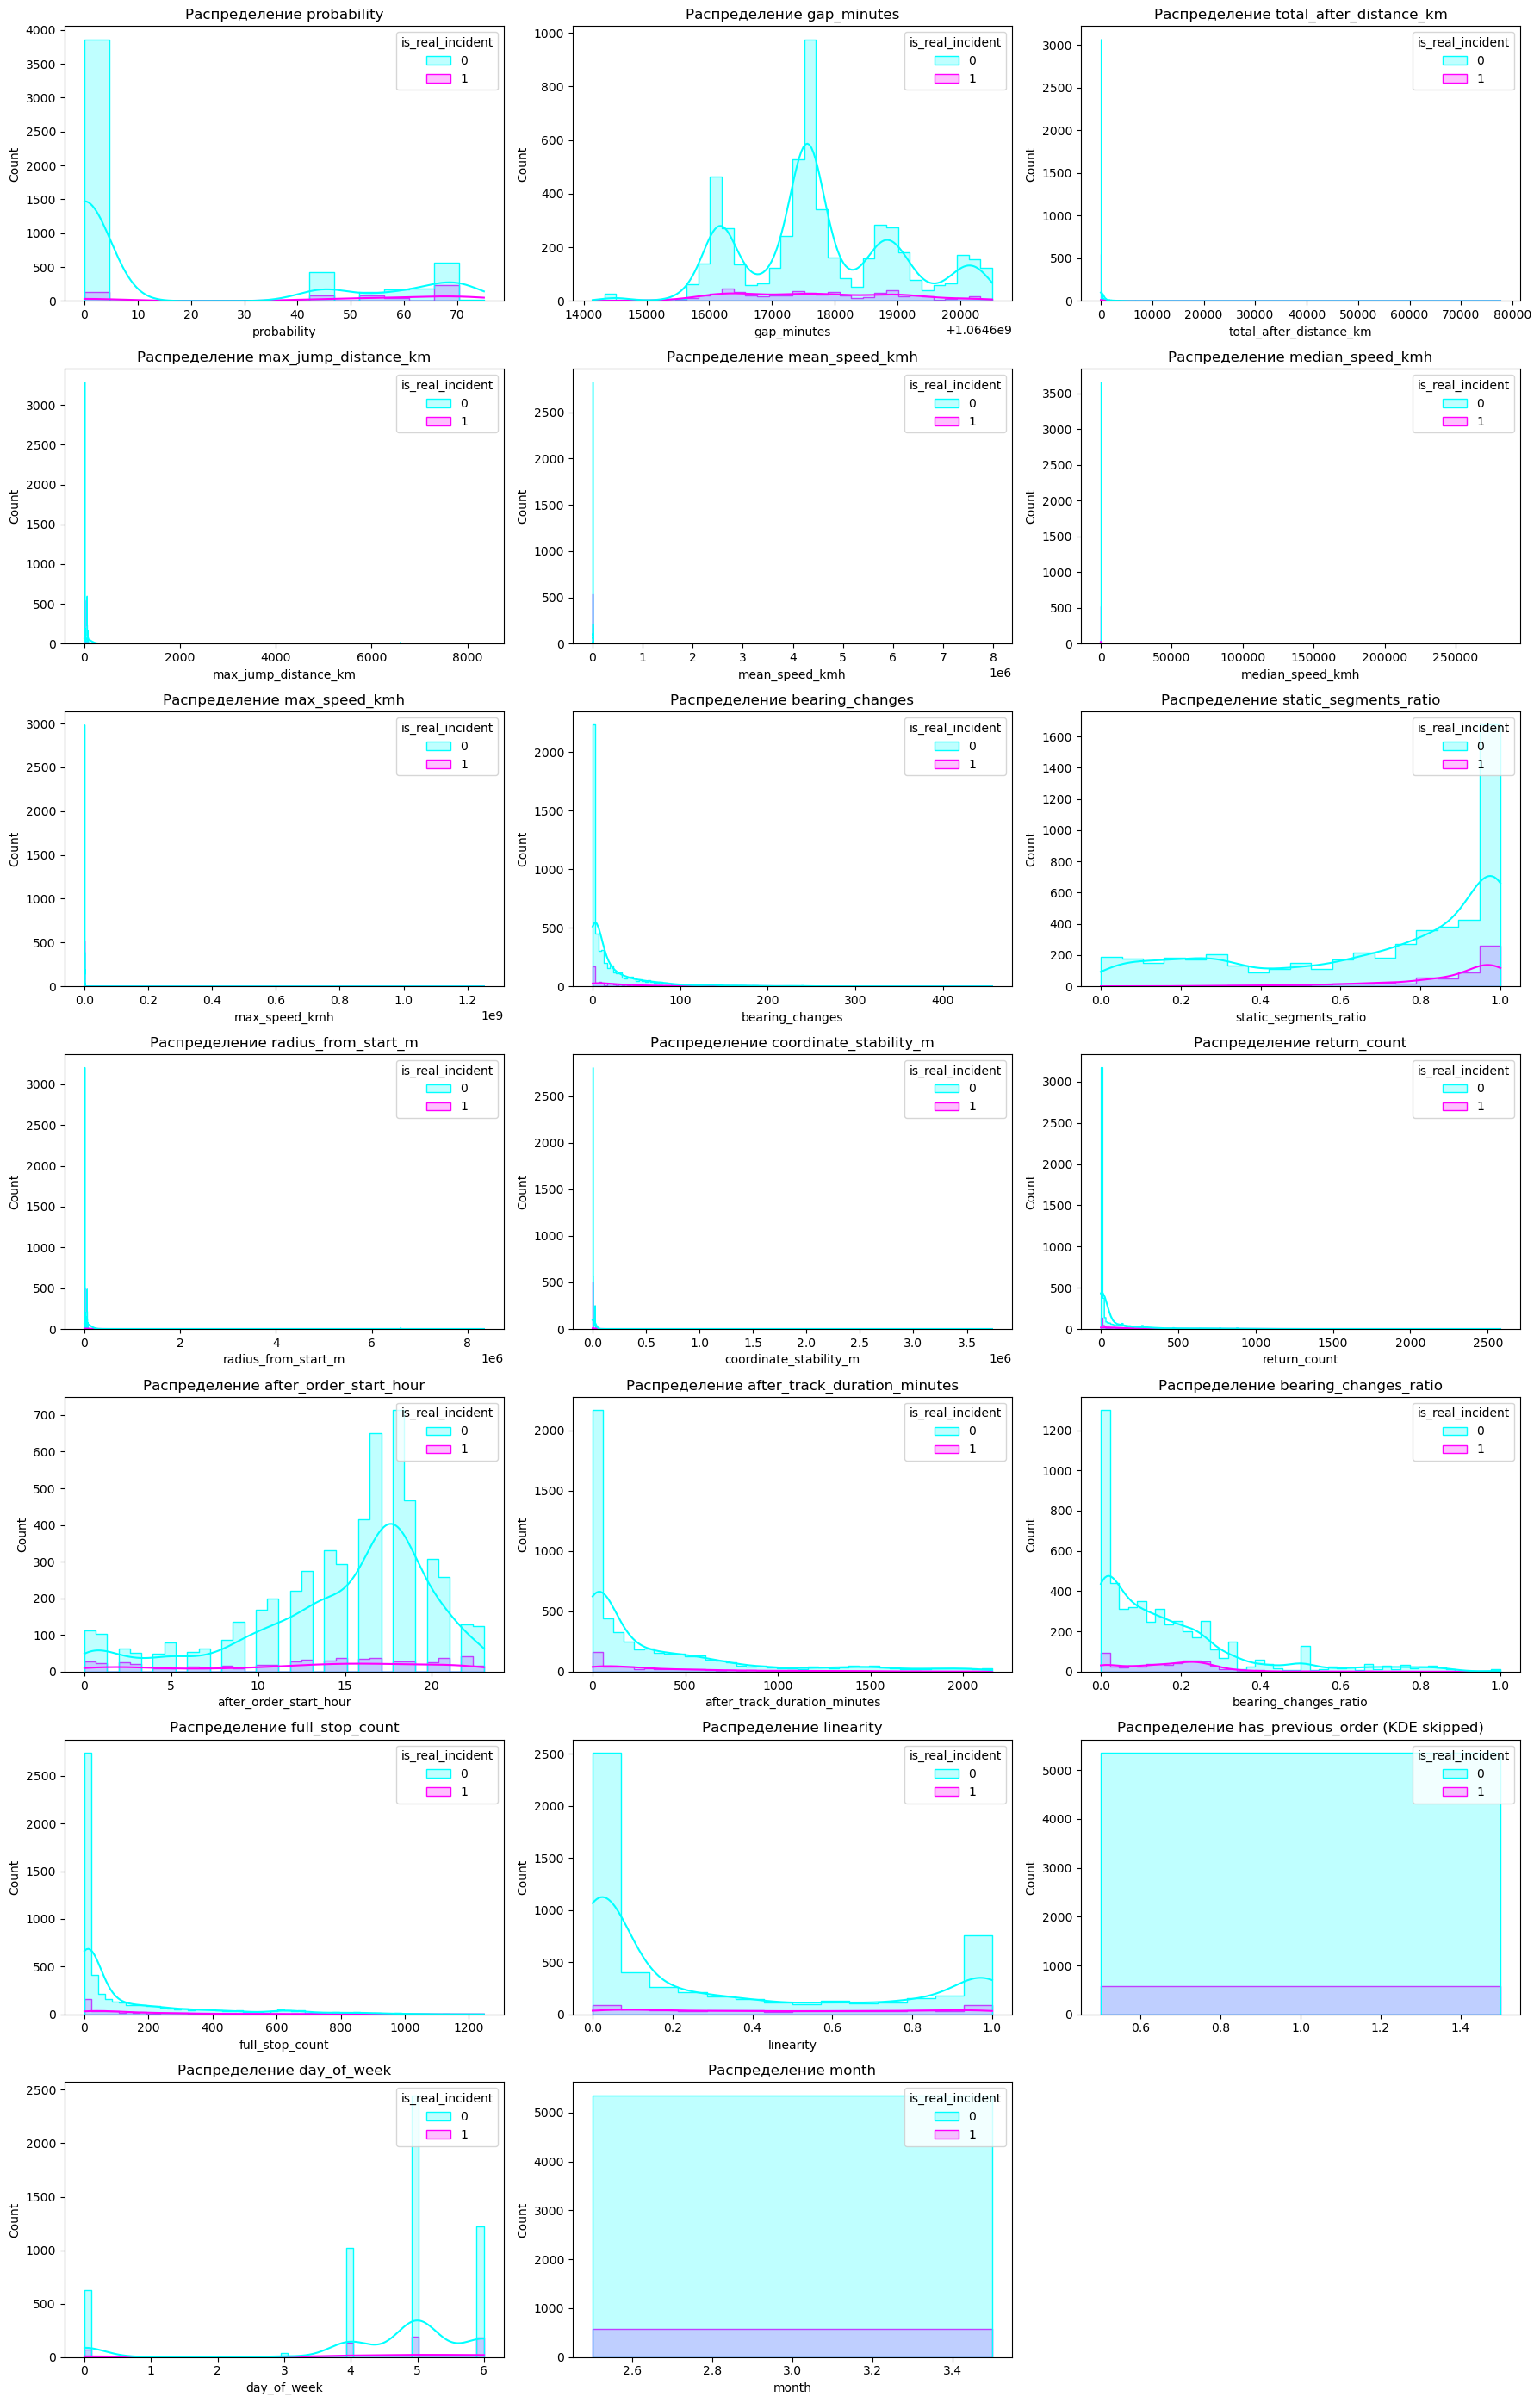

In [57]:
def plot_distributions(dataframe, n_cols=3, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
    num_features = [col for col in dataframe.select_dtypes(include=['number']).columns
                    if col not in exclude_cols]
    
    n_rows = int(np.ceil(len(num_features) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(num_features):
        try:
            ax = axes[i]
            sns.histplot(data=dataframe, x=feature, hue='is_real_incident', kde=True,
                         element="step", ax=ax, palette=['cyan', 'magenta'])
            ax.set_title(f'Распределение {feature}')
        except np.linalg.LinAlgError as e:
            sns.histplot(data=dataframe, x=feature, hue='is_real_incident',
                         element="step", ax=ax, palette=['cyan', 'magenta'])
            ax.set_title(f'Распределение {feature} (KDE skipped)')
            ax.set_xlabel('')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

exclude_from_plots = ['incident_id', 'is_real_incident']
print("Визуализация распределений числовых признаков:")
plot_distributions(df, exclude_cols=exclude_from_plots)


total_after_distance_km логнормальное распределение
max_jump_distance_km логнормальное распределение
mean_speed_km нормальное распределение
return_count логнормальное распределение
coordinate_stability_m логнормальное распределение
radius_from_status_m логнормальное 
has_previous_order, month бинарные признаки

C:\Users\Asus\AppData\Local\Temp\ipykernel_12868\3933624777.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='is_real_incident', y=feature, ax=ax, palette=['cyan', 'magenta'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_12868\3933624777.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='is_real_incident', y=feature, ax=ax, palette=['cyan', 'magenta'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_12868\3933624777.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe, x='is_real_incident', 

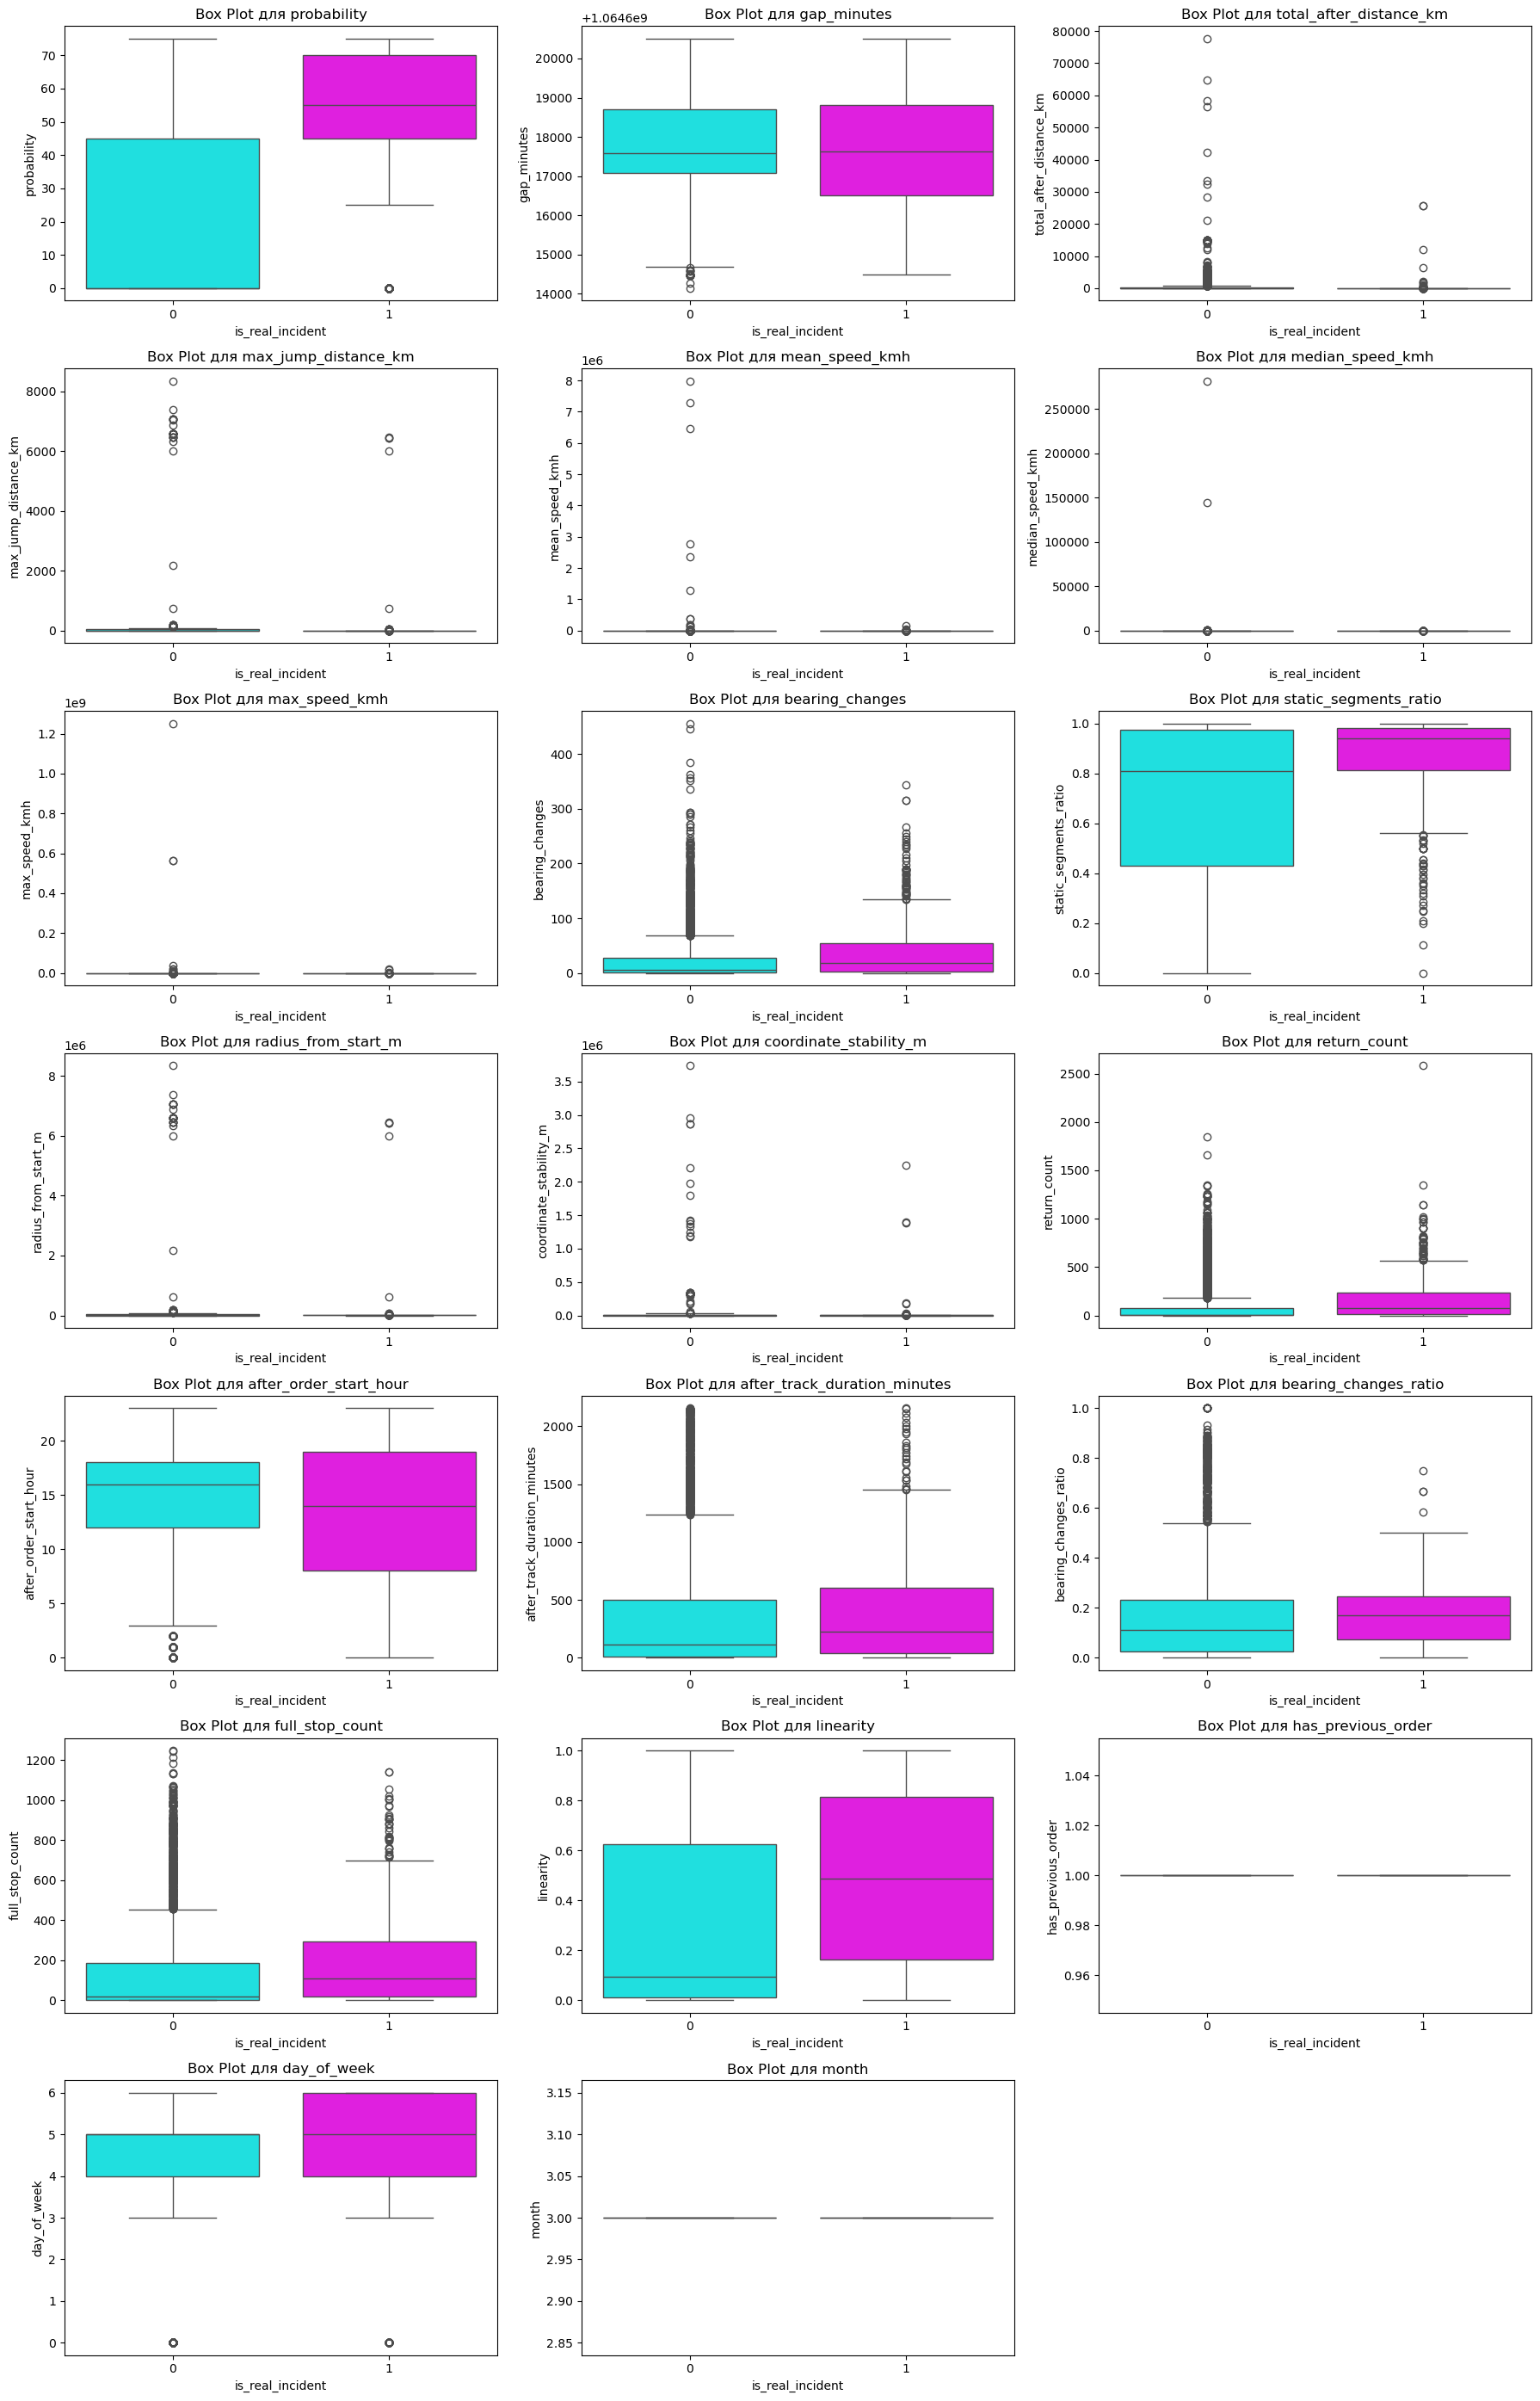

In [58]:
def plot_boxplots(dataframe, n_cols=3, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols=[]
    num_features = [col for col in dataframe.select_dtypes(include=['number']).columns
                    if col not in exclude_cols]
    n_rows = int(np.ceil(len(num_features) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()

    for i, feature in enumerate(num_features):
        ax = axes[i]
        sns.boxplot(data=dataframe, x='is_real_incident', y=feature, ax=ax, palette=['cyan', 'magenta'])
        ax.set_title(f'Box Plot для {feature}')
        ax.set_xlabel('is_real_incident')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
plot_boxplots(df, exclude_cols=exclude_from_plots)

**IQR**

In [59]:
def handle_outliers(dataframe, columns):
    df_cleaned = dataframe.copy()

    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_count = ((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)).sum()
        outliers_percent = outliers_count / len(df_cleaned) * 100

        print(f"Признак {column} : обнаружено {outliers_count} выбросов ({outliers_percent:.2f}%)")

        df_cleaned[column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

    return df_cleaned

In [60]:
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
cols_for_outlier_detection = [col for col in numeric_features if col not in ['incident_id', 'is_real_incident']]

In [61]:
df_cleaned = handle_outliers(df, cols_for_outlier_detection)

Признак probability : обнаружено 0 выбросов (0.00%)
Признак gap_minutes : обнаружено 2 выбросов (0.03%)
Признак total_after_distance_km : обнаружено 1077 выбросов (18.14%)
Признак max_jump_distance_km : обнаружено 63 выбросов (1.06%)
Признак mean_speed_kmh : обнаружено 799 выбросов (13.46%)
Признак median_speed_kmh : обнаружено 1422 выбросов (23.95%)
Признак max_speed_kmh : обнаружено 394 выбросов (6.64%)
Признак bearing_changes : обнаружено 569 выбросов (9.58%)
Признак static_segments_ratio : обнаружено 0 выбросов (0.00%)
Признак radius_from_start_m : обнаружено 63 выбросов (1.06%)
Признак coordinate_stability_m : обнаружено 212 выбросов (3.57%)
Признак return_count : обнаружено 837 выбросов (14.10%)
Признак after_order_start_hour : обнаружено 357 выбросов (6.01%)
Признак after_track_duration_minutes : обнаружено 534 выбросов (8.99%)
Признак bearing_changes_ratio : обнаружено 338 выбросов (5.69%)
Признак full_stop_count : обнаружено 618 выбросов (10.41%)
Признак linearity : обнаружено

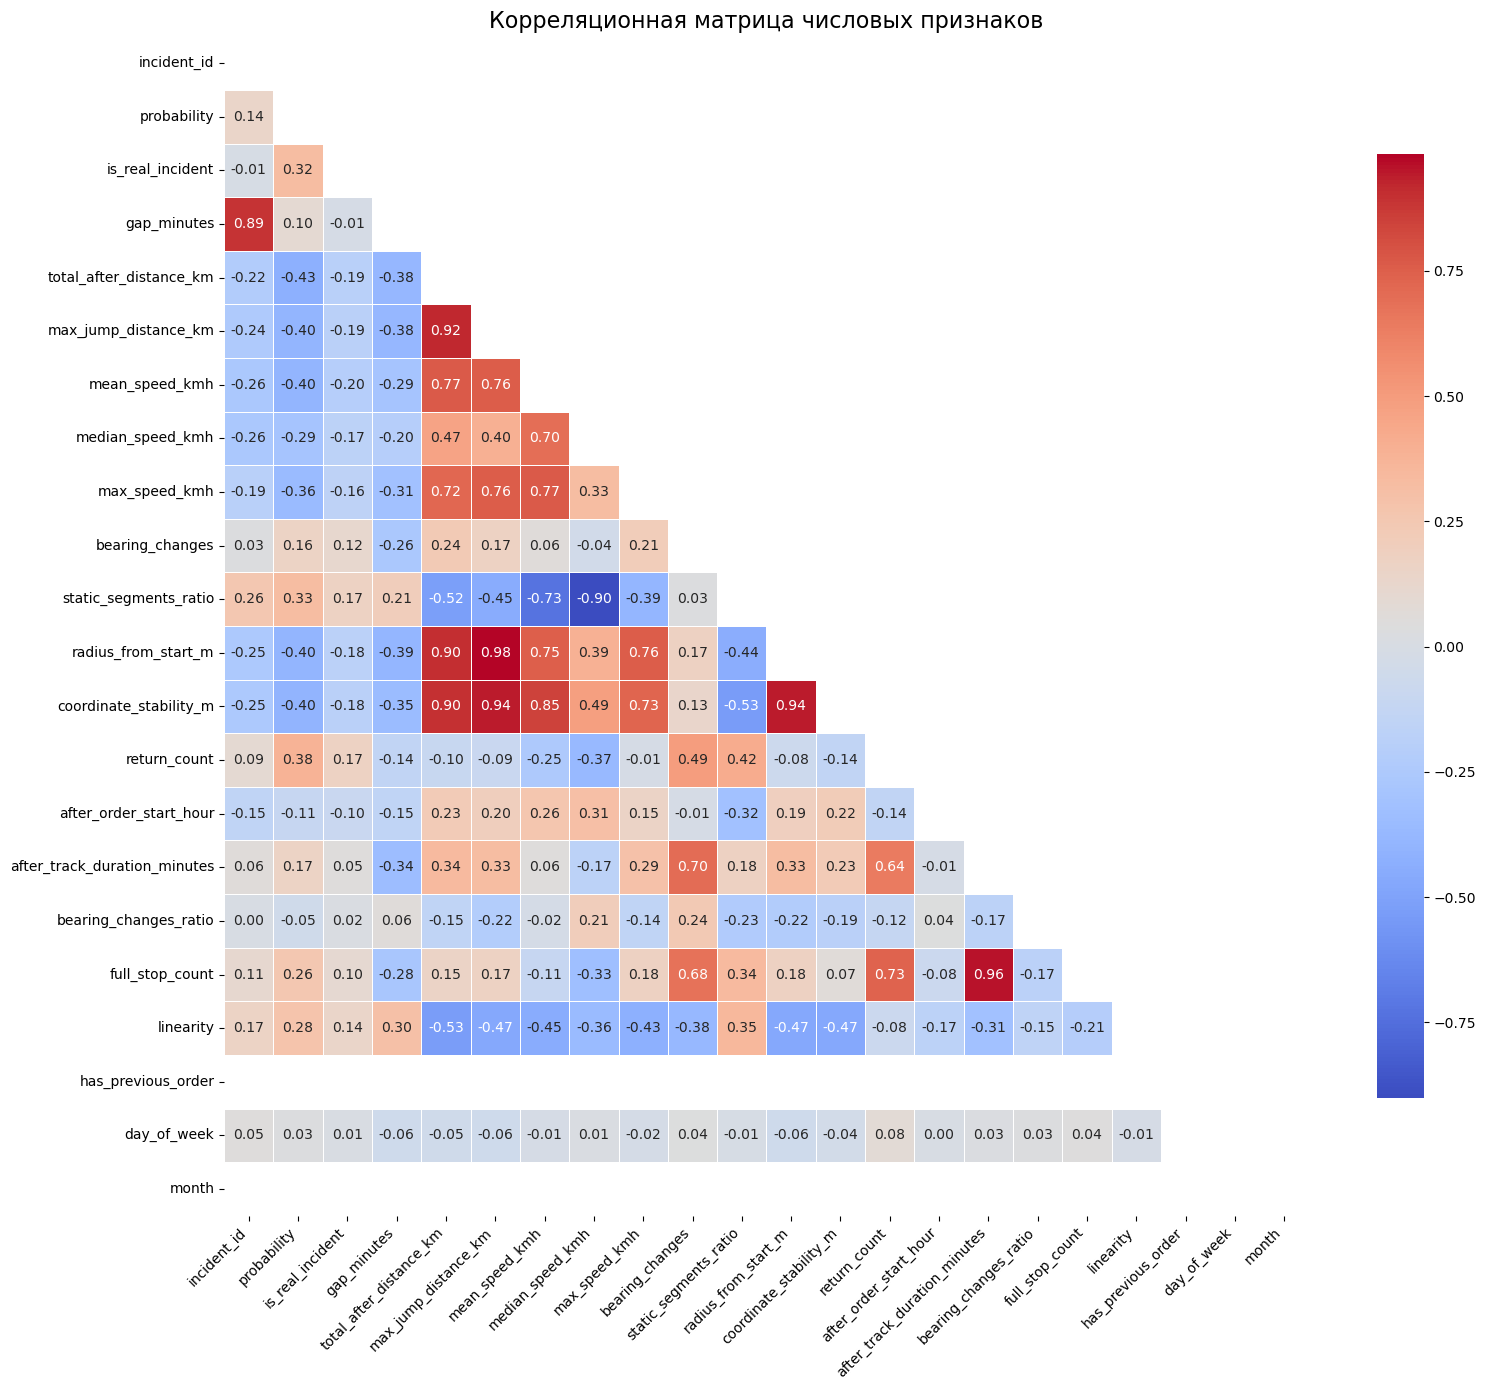

In [62]:
plt.figure(figsize=(16, 14))
correlation_matrix = df_cleaned.select_dtypes(include=['number']).corr()
mask=np.triu(correlation_matrix) #треугольная матрица
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица числовых признаков', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

самая большая корреляция происходит между признаками full_stop_count - after_track_duration_minutes, coordinat_stability_m - radius_from_start_m, coordinate_stability_m - max_jump_distance_km, coordinate_stability_m - total_after_distance_km, radius_from_start_m - max_jump_distance_km, static_segments_ratio - median_speed_kmh, gap_minutes - incident_id, max_jump_distance_km - total_after_distance_km

**Найдём самые коррелирующие признаки**

In [63]:
target_correlation = correlation_matrix['is_real_incident'].drop('is_real_incident').sort_values(ascending=False)
print(target_correlation)

probability                     0.321676
return_count                    0.168524
static_segments_ratio           0.167060
linearity                       0.141641
bearing_changes                 0.118450
full_stop_count                 0.102139
after_track_duration_minutes    0.053548
bearing_changes_ratio           0.018487
day_of_week                     0.011118
incident_id                    -0.005694
gap_minutes                    -0.012348
after_order_start_hour         -0.098395
max_speed_kmh                  -0.163174
median_speed_kmh               -0.167648
radius_from_start_m            -0.176633
coordinate_stability_m         -0.183798
max_jump_distance_km           -0.185964
total_after_distance_km        -0.191103
mean_speed_kmh                 -0.201764
has_previous_order                   NaN
month                                NaN
Name: is_real_incident, dtype: float64


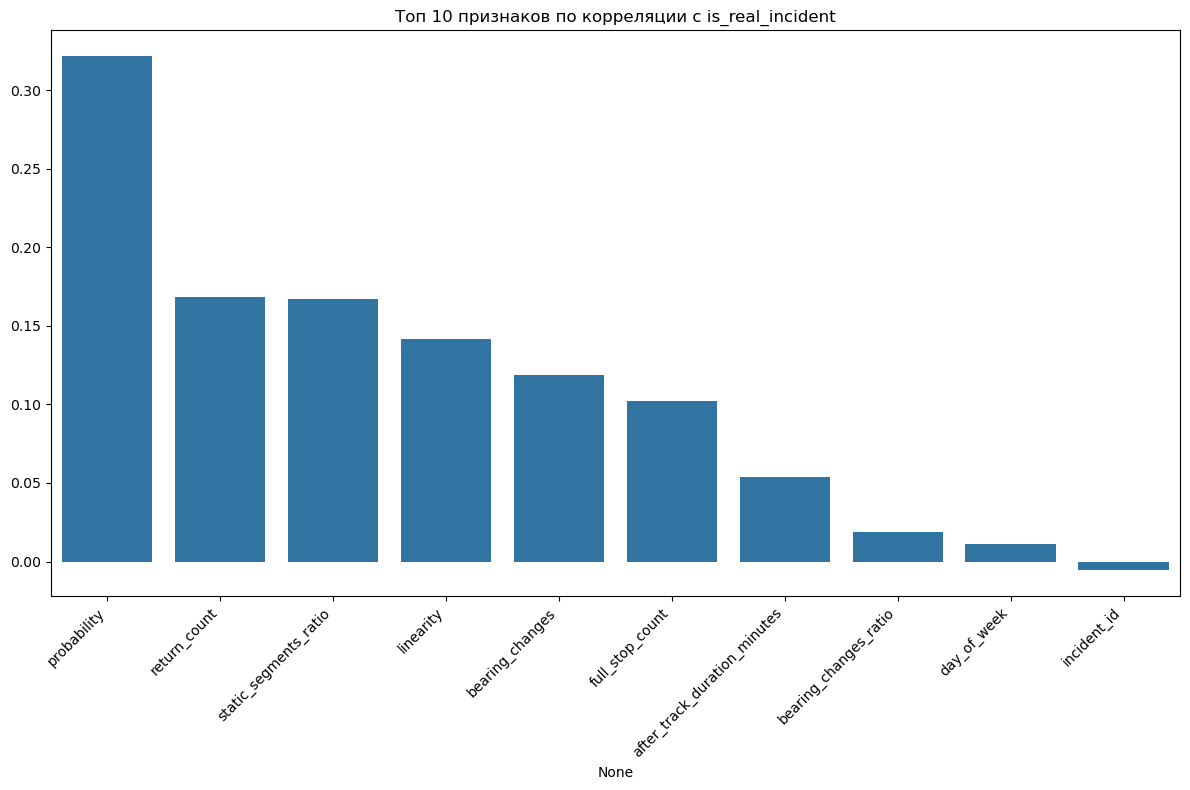

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x=target_correlation.index[:10], y=target_correlation.values[:10])
plt.title('Топ 10 признаков по корреляции с is_real_incident')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [65]:
def log_transform(dataframe, features):
    df_transformed = dataframe.copy()
    for feature in features:
        min_value = df_transformed[feature].min()
        if min_value <= 0:
            shift = abs(min_value) + 1
            df_transformed[f'{feature}_log'] = np.log1p(df_transformed[feature] + shift)
            print(f"Применено log-преобразование к {feature} с добавлением константы {shift}")
        else:
            df_transformed[f'{feature}_log'] = np.log1p(df_transformed[feature])
            print(f"Применено log-преобразование к {feature}")
    return df_transformed

In [66]:
skewed_features = ['total_after_distance_km', 'max_jump_distance_km', 'max_speed_kmh',
                   'radius_from_start_m', 'coordinate_stability_m']
df_transformed = log_transform(df_cleaned, skewed_features)

Применено log-преобразование к total_after_distance_km с добавлением константы 1.0
Применено log-преобразование к max_jump_distance_km с добавлением константы 1.0
Применено log-преобразование к max_speed_kmh с добавлением константы 1.0
Применено log-преобразование к radius_from_start_m с добавлением константы 1.0
Применено log-преобразование к coordinate_stability_m с добавлением константы 1.0


In [67]:
def scale_features(dataframe, features, scaler_type='standard'):
    df_scaled = dataframe.copy()
    if scaler_type == 'standard':
        scaler = StandardScaler()
        suffix = '_scaled'
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
        suffix = '_norm'
    else:
        raise ValueError("Неподдерживаемый тип масштабирования")
    scaled_features = scaler.fit_transform(df_scaled[features])
    for i, feature in enumerate(features):
        df_scaled[f'{feature}{suffix}'] = scaled_features[:, i]

    return df_scaled, scaler


In [68]:
features_to_scale = [col for col in df_transformed.select_dtypes(include=['number']).columns
                    if col not in ['incident_id', 'is_real_incident']]

In [69]:
df_scaled, std_scaler = scale_features(df_transformed, features_to_scale, 'standard')

In [70]:
df_normalized, minmax_scaler = scale_features(df_transformed, features_to_scale, 'minmax')

In [71]:
df_normalized

,incident_id,probability,is_real_incident,last_order_end,after_order_start,gap_minutes,total_after_distance_km,max_jump_distance_km,mean_speed_kmh,median_speed_kmh,...,full_stop_count_norm,linearity_norm,has_previous_order_norm,day_of_week_norm,month_norm,total_after_distance_km_log_norm,max_jump_distance_km_log_norm,max_speed_kmh_log_norm,radius_from_start_m_log_norm,coordinate_stability_m_log_norm
0,25744,70,0,NaT,2025-03-10 01:12:28.299,1.064619e+09,1.12400,0.135,0.08000,0.04000,...,1.000000,0.316,0.0,0.000000,0.0,0.078433,0.017823,0.168117,0.491393,0.381432
1,25743,0,0,NaT,2025-03-10 18:12:55.712,1.064620e+09,0.02200,0.002,0.46000,0.02000,...,0.069317,0.108,0.0,0.000000,0.0,0.001924,0.000273,0.292179,0.077882,0.040218
2,25741,70,0,NaT,2025-03-10 16:36:27.604,1.064620e+09,2.63500,0.571,37.35000,0.18000,...,0.132518,0.030,0.0,0.000000,0.0,0.147819,0.068526,0.971576,0.568839,0.508494
3,25740,70,0,NaT,2025-03-10 12:00:00.595,1.064620e+09,5.89800,0.490,0.90000,0.26000,...,0.348624,0.013,0.0,0.000000,0.0,0.241555,0.059792,0.279193,0.510506,0.450235
4,25739,0,0,NaT,2025-03-10 19:06:51.672,1.064621e+09,0.25200,0.237,74.77000,0.16000,...,0.008155,0.951,0.0,0.000000,0.0,0.020871,0.030556,0.757368,0.454140,0.390382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,18169,0,0,NaT,2025-03-07 17:33:35.053,1.064616e+09,587.38225,48.488,236.09125,5.35625,...,0.059123,0.010,0.0,0.428571,0.0,1.000000,0.880928,0.878806,0.959834,0.982841
5934,18167,0,0,NaT,2025-03-07 14:51:46.647,1.064616e+09,334.55700,51.441,57.32000,0.00000,...,0.265036,0.020,0.0,0.428571,0.0,0.901457,0.896438,0.882792,0.961590,0.962511
5935,18164,0,0,NaT,2025-03-07 16:02:20.064,1.064616e+09,587.38225,50.525,236.09125,5.35625,...,0.065240,0.010,0.0,0.428571,0.0,1.000000,0.891721,0.883507,0.966318,1.000000
5936,18163,0,0,NaT,2025-03-07 19:55:48.762,1.064616e+09,131.05100,50.605,236.09125,5.35625,...,0.000000,0.079,0.0,0.428571,0.0,0.738241,0.892136,0.924385,0.960374,0.984930


In [72]:
real_incident = df_cleaned[df_cleaned['is_real_incident'] == 1]

In [73]:
weekend_data = real_incident[real_incident['is_weekend'] == True]
weekday_data = real_incident[real_incident['is_weekend'] == False]

C:\Users\Asus\AppData\Local\Temp\ipykernel_12868\3043084802.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day Type', y='Percentage', data=percent_df, palette='coolwarm')


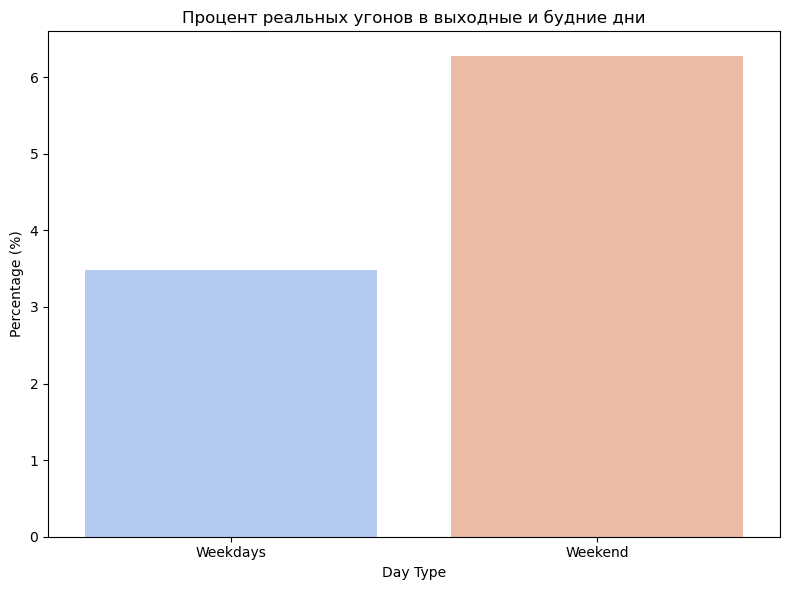

In [ ]:
X = df_cleaned.drop(['incident_id', 'is_real_incident', 'last_order_end', 'after_order_start'], axis=1)
y = df_cleaned['is_real_incident']

weekend_percentage = (len(weekend_data) / len(df)) * 100
weekday_percentage = (len(weekday_data) / len(df)) * 100

percentages = {
    'Day Type': ['Weekdays', 'Weekend'],
    'Percentage': [weekday_percentage, weekend_percentage]
}

percent_df = pd.DataFrame(percentages)

plt.figure(figsize=(8, 6))
sns.barplot(x='Day Type', y='Percentage', data=percent_df, palette='coolwarm')
plt.title('Процент реальных угонов в выходные и будние дни')
plt.ylabel('Percentage (%)')
plt.xlabel('Day Type')
plt.tight_layout()
plt.show()

В выходные намного чаще крадут

In [75]:
X

,probability,gap_minutes,total_after_distance_km,max_jump_distance_km,mean_speed_kmh,median_speed_kmh,max_speed_kmh,bearing_changes,static_segments_ratio,radius_from_start_m,...,return_count,after_order_start_hour,after_track_duration_minutes,bearing_changes_ratio,full_stop_count,linearity,has_previous_order,day_of_week,month,is_weekend
0,70,1.064619e+09,1.12400,0.135,0.08000,0.04000,5.09,76,0.992,355.60,...,229.5,3,1087.73,0.2480,490.5,0.316,1,2.5,3.0,False
1,0,1.064620e+09,0.02200,0.002,0.46000,0.02000,16.04,13,0.973,2.55,...,36.0,18,67.21,0.3610,34.0,0.108,1,2.5,3.0,False
2,70,1.064620e+09,2.63500,0.571,37.35000,0.18000,2999.62,11,0.776,807.81,...,46.0,16,162.25,0.1310,65.0,0.030,1,2.5,3.0,False
3,70,1.064620e+09,5.89800,0.490,0.90000,0.26000,14.36,33,0.872,435.53,...,141.0,12,437.85,0.1690,171.0,0.013,1,2.5,3.0,False
4,0,1.064621e+09,0.25200,0.237,74.77000,0.16000,596.49,4,0.875,239.35,...,0.0,19,8.06,0.5455,4.0,0.951,1,2.5,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,0,1.064616e+09,587.38225,48.488,236.09125,5.35625,1491.03,9,0.357,50182.04,...,1.0,17,166.83,0.1070,29.0,0.010,1,4.0,3.0,False
5934,0,1.064616e+09,334.55700,51.441,57.32000,0.00000,1536.50,7,0.800,51120.80,...,96.0,14,328.24,0.0400,130.0,0.020,1,4.0,3.0,False
5935,0,1.064616e+09,587.38225,50.525,236.09125,5.35625,1544.81,7,0.272,53736.65,...,7.0,16,257.15,0.0520,32.0,0.010,1,4.0,3.0,False
5936,0,1.064616e+09,131.05100,50.605,236.09125,5.35625,2102.14,2,0.000,50468.99,...,0.0,19,23.07,0.1540,0.0,0.079,1,4.0,3.0,False


In [76]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Можно выбрать 'median' или 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Преобразуйте обратно в DataFrame (если нужно сохранить столбцы)
X = pd.DataFrame(X_imputed, columns=X.columns)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17 19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


                         Feature       Score        P-value
0                    probability  685.124372  5.147252e-143
4                 mean_speed_kmh  251.900540   1.373758e-55
2        total_after_distance_km  225.002680   5.977533e-50
3           max_jump_distance_km  212.635985   2.388765e-47
10        coordinate_stability_m  207.538107   2.833769e-46
9            radius_from_start_m  191.162563   8.125032e-43
11                  return_count  173.512648   4.450648e-39
5               median_speed_kmh  171.661592   1.099653e-38
8          static_segments_ratio  170.425450   2.012194e-38
6                  max_speed_kmh  162.372953   1.034353e-36
16                     linearity  121.527055   5.466639e-28
7                bearing_changes   84.469178   5.292684e-20
15               full_stop_count   62.579855   3.029632e-15
12        after_order_start_hour   58.031870   2.983706e-14
13  after_track_duration_minutes   17.069615   3.652968e-05
20                    is_weekend    4.37

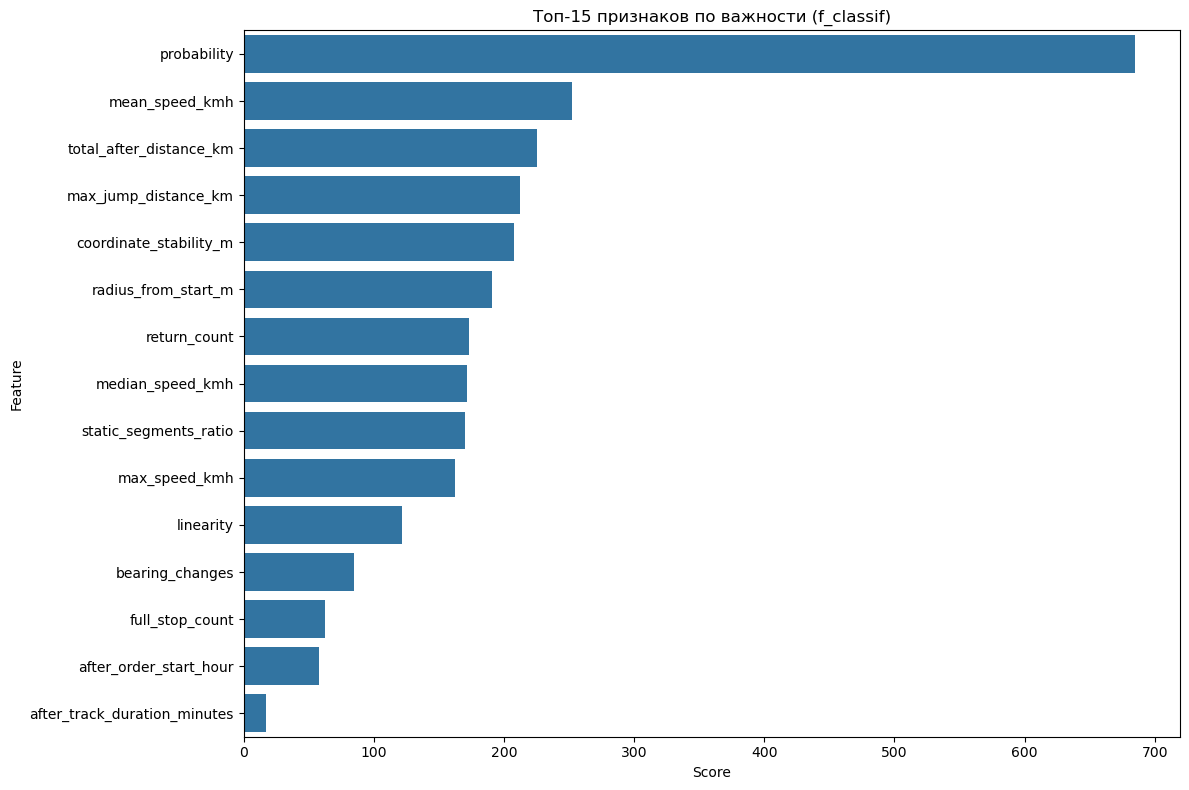

In [77]:

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Создаем DataFrame с оценками важности признаков
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)
print(feature_scores)

# Визуализация оценок важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores.head(15))
plt.title('Топ-15 признаков по важности (f_classif)')
plt.tight_layout()
plt.show()




Оценка важности признаков с помощью RandomForest:
                         Feature  Importance
10        coordinate_stability_m    0.074068
3           max_jump_distance_km    0.072974
9            radius_from_start_m    0.068788
4                 mean_speed_kmh    0.067993
2        total_after_distance_km    0.067061
16                     linearity    0.064948
13  after_track_duration_minutes    0.064471
1                    gap_minutes    0.062733
14         bearing_changes_ratio    0.058225
8          static_segments_ratio    0.057915
6                  max_speed_kmh    0.054628
5               median_speed_kmh    0.046901
15               full_stop_count    0.045292
12        after_order_start_hour    0.045188
11                  return_count    0.044630
0                    probability    0.043439
7                bearing_changes    0.040230
18                   day_of_week    0.014598
20                    is_weekend    0.005919
17            has_previous_order    0.000000
19  

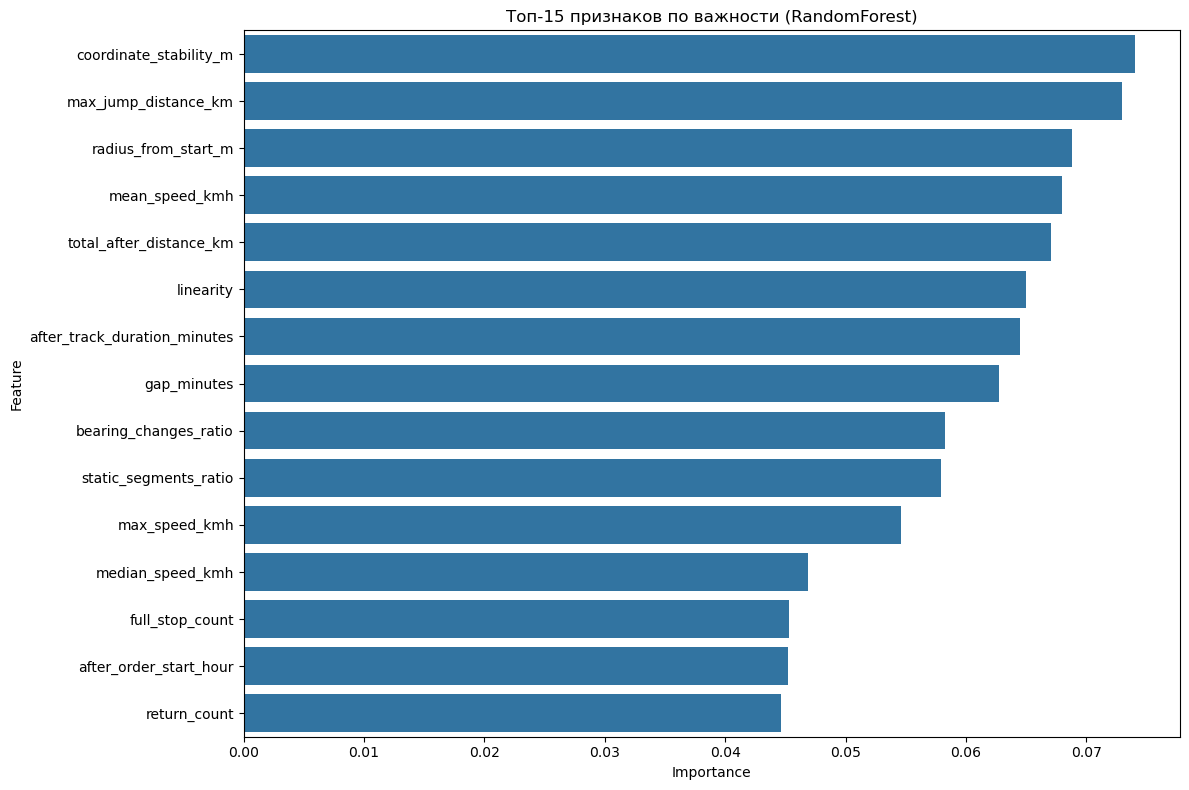

In [78]:
print("\nОценка важности признаков с помощью RandomForest:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False)
print(rf_feature_importance)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(15))
plt.title('Топ-15 признаков по важности (RandomForest)')
plt.tight_layout()
plt.show()